# Air Passengers Prediction

## Problem Statement

Airline industry has been growing at an outstanding rate with an annual growth rate about 6% worldwide in
passenger load for the past decade. Airport transport industry around the globe has faced extreme challenge of
handling high volumes of passengers due to the economy growth and most of them are already operating at
80% - 90% of their capacity in the recent year. The major clients - the airlines for the airport are also facing
enormous pressure from the passengers to provide good services starting from the airport. Currently, the
airport is using a fixed passenger load of Y% for all the airlines to predict the passenger flows for departure
flights

This dataset provides monthly totals of a US airline passengers from 1949 to 1960.Use the different
forecasring/Machine Learning techniques to predict the airlines passengers.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
df=pd.read_csv("AirPassengers.csv")
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
df.shape

(144, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
df['Month']=pd.to_datetime(df['Month'], infer_datetime_format=True)
df.rename(columns={'#Passengers': 'Passengers'}, inplace=True)
df=df.set_index(['Month'])
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
print(df.isna().sum())

Passengers    0
dtype: int64


## Time Series Analysis

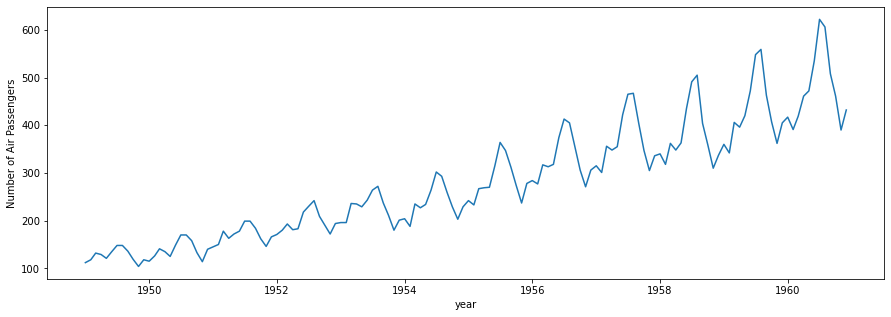

In [7]:
plt.figure(figsize=(15,5))
plt.xlabel("year")
plt.ylabel("Number of Air Passengers")
plt.plot(df)

<AxesSubplot:>

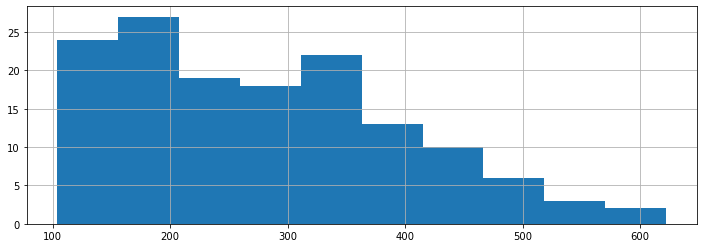

In [8]:
df['Passengers'].hist(figsize=(12,4))

frequency of the number of passenger are good and continious.
As the number of passengers increases but frequency of that number of passengers decreases.

C:\Users\msing\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


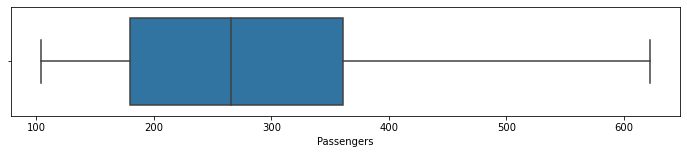

In [9]:
#Check Outlier 
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(df['Passengers'])

There is no outliers detected.

In [10]:
dates = pd.date_range(start='1949-01-01', freq='MS',periods=len(df))

In [11]:
df['Year'] = dates.year
df['Month'] = dates.month

In [12]:
df

,Passengers,Year,Month
Month,,,
1949-01-01,112,1949,1
1949-02-01,118,1949,2
1949-03-01,132,1949,3
1949-04-01,129,1949,4
1949-05-01,121,1949,5
...,...,...,...
1960-08-01,606,1960,8
1960-09-01,508,1960,9
1960-10-01,461,1960,10


In [13]:
import calendar
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

In [14]:
df['Date'] = dates
df.set_index('Date',inplace=True)

In [15]:
df

,Passengers,Year,Month
Date,,,
1949-01-01,112,1949,Jan
1949-02-01,118,1949,Feb
1949-03-01,132,1949,Mar
1949-04-01,129,1949,Apr
1949-05-01,121,1949,May
...,...,...,...
1960-08-01,606,1960,Aug
1960-09-01,508,1960,Sep
1960-10-01,461,1960,Oct


In [16]:
df.describe()

,Passengers,Year
count,144.000000,144.000000
mean,280.298611,1954.500000
std,119.966317,3.464102
min,104.000000,1949.000000
25%,180.000000,1951.750000
50%,265.500000,1954.500000
75%,360.500000,1957.250000
max,622.000000,1960.000000


<AxesSubplot:>

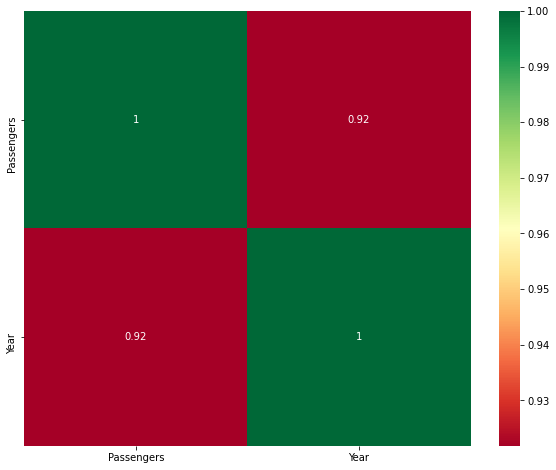

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

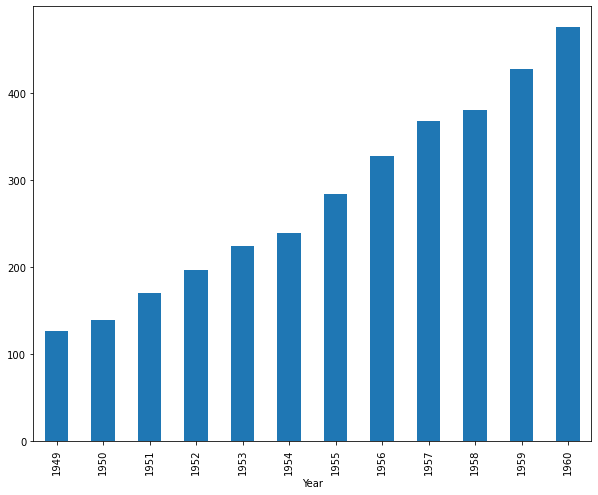

In [18]:
plt.figure(figsize=(10,8))
df.groupby('Year')['Passengers'].mean().plot(kind='bar')
plt.show()

passengers are increasing with the increase in the year

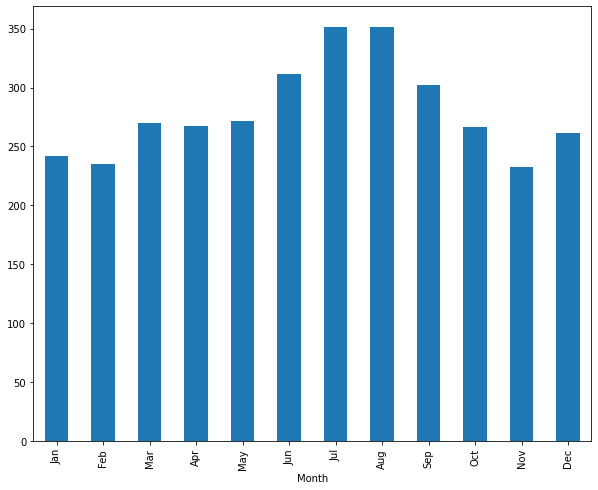

In [19]:
plt.figure(figsize=(10,8))
df.groupby('Month')['Passengers'].mean().reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).plot(kind='bar')
plt.show()

more passengers can be seen between months June to September

In [20]:
monthly = pd.pivot_table(data=df,values='Passengers',index='Month',columns='Year')
monthly = monthly.reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

In [21]:
monthly

Year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
Month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


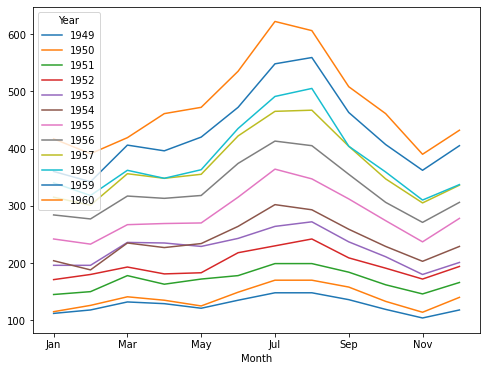

In [22]:
monthly.plot(figsize=(8,6))
plt.show()

In [23]:
yearly = pd.pivot_table(data=df,values='Passengers',index='Year',columns='Month')
yearly = yearly[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

In [24]:
yearly

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


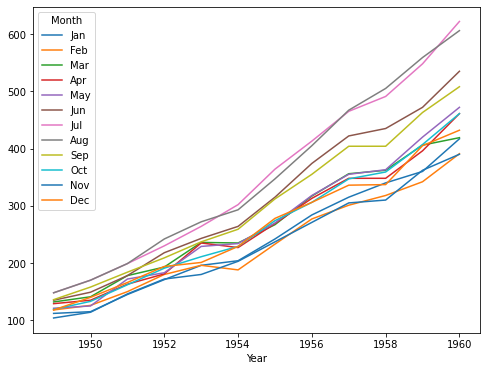

In [25]:
yearly.plot(figsize=(8,6))
plt.show()

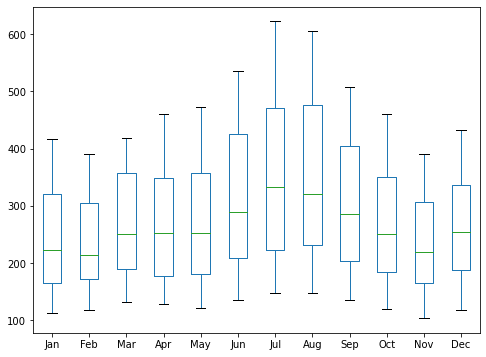

In [26]:
yearly.plot(kind='box',figsize=(8,6))
plt.show()

The passengers are increasing without fall every year.

July and August are the peak months for passengers.

We can see a seasonal cycle of 12 months where the mean value of each month 
starts with a increasing trend in the beginning of the year and drops down 
towards the end of the year. 

## Time series decomposition

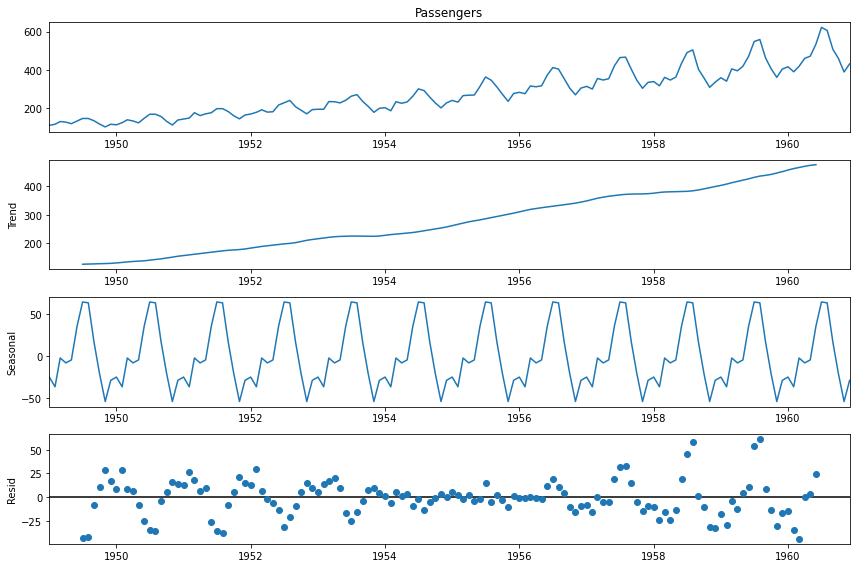

In [27]:
#Additive seasonal decomposition
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(df['Passengers'], model='additive')
fig = decomposition.plot()
plt.show()

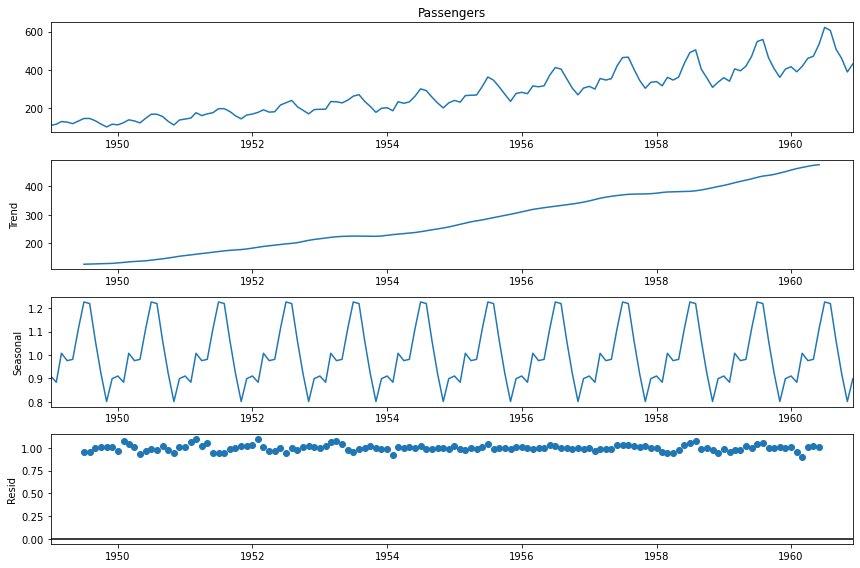

In [28]:
#Multiplicative seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(df['Passengers'], model='multiplicative')
fig = decomposition.plot()
plt.show()

## Build and Evaluate time series forecast
Splitting the data into train and test set
We are going to forecat for the last two years. 1959 and 1960.

Last 24 records contain 1959 and 1960 data.

In [29]:
train_len = 120
train = df[0:train_len]
# 1959 and 1960 data
test = df[train_len:]

## Simple average method
Forecast = Average of all past months’ data

Average of all the train data values assigned to the test data.

In [30]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Passengers'].mean()
y_hat_avg.head()

,Passengers,Year,Month,avg_forecast
Date,,,,
1959-01-01,360,1959,Jan,245.908333
1959-02-01,342,1959,Feb,245.908333
1959-03-01,406,1959,Mar,245.908333
1959-04-01,396,1959,Apr,245.908333
1959-05-01,420,1959,May,245.908333


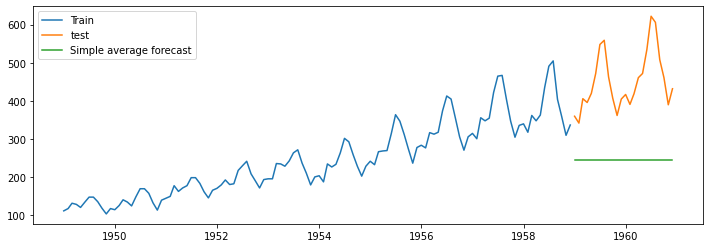

In [31]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.show()

We have unnder estimated the actual test value while doing the forecasting. Because we took the mean of all the lower values, while the trend of the time series is in increasing pattern.

## Simple moving average method
In the simple moving average method, we take the average of only the last observations to forecast the future.

In [32]:
# We are copying entire data because we want to see the forecast for the entire dataset (train and test)
y_hat_sma = df.copy()

In [33]:
# Moving average window. We will take the avg of last 12 months for forecasting the future. 
ma_window = 12

In [34]:
# Rolling function calculated the last number of records
y_hat_sma['sma_forecast'] = df['Passengers'].rolling(ma_window).mean()

In [35]:
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

<ipython-input-35-ac7e96fa42cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]
C:\Users\msing\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


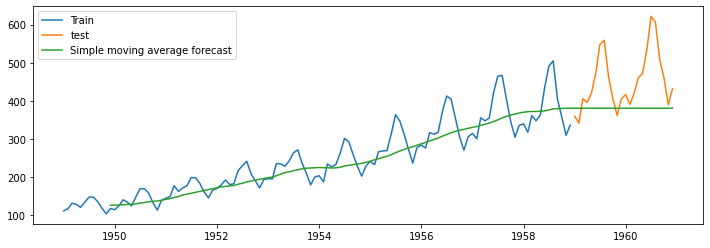

In [36]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.show()

We can see that teh result is better than the simple avg.

The seasonal effect can not be captured.

There is a trend in the forecasting line which grows linearly.

### Simple Exponential Smoothing

In [37]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [38]:
# Instantiate the model
model = SimpleExpSmoothing(train['Passengers'])
# Fit the model with alpha = 0.2 
# optimized = False means, we are explicitly definign the smoothing_level.
# optimized = True means - Automitacially it will define a smoothing_level based on RMSE
model_fit = model.fit(smoothing_level = 0.2, optimized=False)
model_fit.params

C:\Users\msing\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\msing\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


{'smoothing_level': 0.2,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [39]:
y_hat_ses = test.copy()
# Forecast for 24 months
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

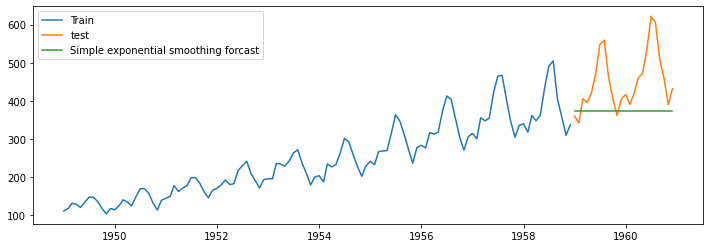

In [40]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

No seasonality captures.

Most recent observation gets higher weightages than the older ones for forecasting.